# Prep Course Capstone Project – “Olympic history: athletes and results” Dataset Study

July 2018 by Raaj Bhavsar
The aim of this project is to analyze the Olympic history: athletes and results dataset. I will now refer to this dataset as the Olympic dataset. The data set offers basic bio data on athletes and medal results from Athens 1896 to Rio 2016. Randi Griffin scraped the data using R code from www.sports-reference.com.   

“This dataset provides an opportunity to ask questions about how the Olympics have evolved over time, including questions about the participation and performance of women, different nations, and different sports and events.” (Randi Griffin)

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://cliparts.co/cliparts/8iG/6pB/8iG6pBKgT.jpg", width = 300, height = 300)

# Data
This dataset contains two CSV files. 
In total, there are:

    •	271116 Data entries
    •	15 fields of various biological information (shown below)


In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Importing the DataSets
DataSet = pd.read_csv('athlete_events.csv')
Df2 = pd.read_csv('noc_regions.csv')

In [4]:
DataSet.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
Df2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# What Can We Determine from the Data?
Upon seeing the data, I have several thoughts about what to explore. Some questions of interest are listed below:
    
        1. Let us use Olympic participation & medalling as a feminism index. This can show how men and women have                 equal opportunities in their home countries? (In what countries have women played a greater role in their             Olympic teams?)
        a. At what times, places in the history of the Olympics do major changes in participation and medalling                  occur?
        b. Are these changes consistent over time or blips in history?

    2. How have the Olympics grown over time?
        a. Number of events?
        b. Number of participants?
        c. Number of countries?

    3. How has participant’s biology (average age, height, weight, sex) changed over time?


In [6]:
#Encoding Categorical Medal Data
#Medals worth Gold = 3, Silver = 2, Bronze = 1, nan = 0
DataSet['Medal'].fillna(0, inplace=True)
mapping = {'Gold' : 3, 'Silver' : 2, 'Bronze' : 1}
DataSet = DataSet.replace({'Medal': mapping})

In [7]:
#Describe the initial statistics 
DataSet.describe()

,ID,Age,Height,Weight,Year,Medal
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480,0.293760
std,39022.286345,6.393561,10.518462,14.348020,29.877632,0.774697
min,1.000000,10.000000,127.000000,25.000000,1896.000000,0.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000,0.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000,0.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000,0.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000,3.000000


In [8]:
#Encoding Categorical Gender Data
#Male = 1, Female = 0
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
DataSet['Sex'] = labelencoder_X.fit_transform(DataSet['Sex'])

# Males will always be 1 and Females will always be 0

In [9]:
#Making Dataframes to show Medals by Country, Sex, Games
MedalSum = DataSet.groupby(['Sex', 'NOC', 'Games'], as_index = False).sum()
MedalSum = MedalSum[['Medal', 'Sex', 'NOC', 'Games']]
MedalSum['Season'] = MedalSum['Games'].astype(str).str[5:]
MedalSum['Year'] = MedalSum['Games'].astype(str).str[:5]

In [10]:
#Make List of Only USA, Switzerland, France, Germany, Great Brittain, Australia
Countries = ['USA', 'SUI', 'FRA', 'GER', 'GBR', 'AUS']
MedalSum = MedalSum.set_index('NOC')

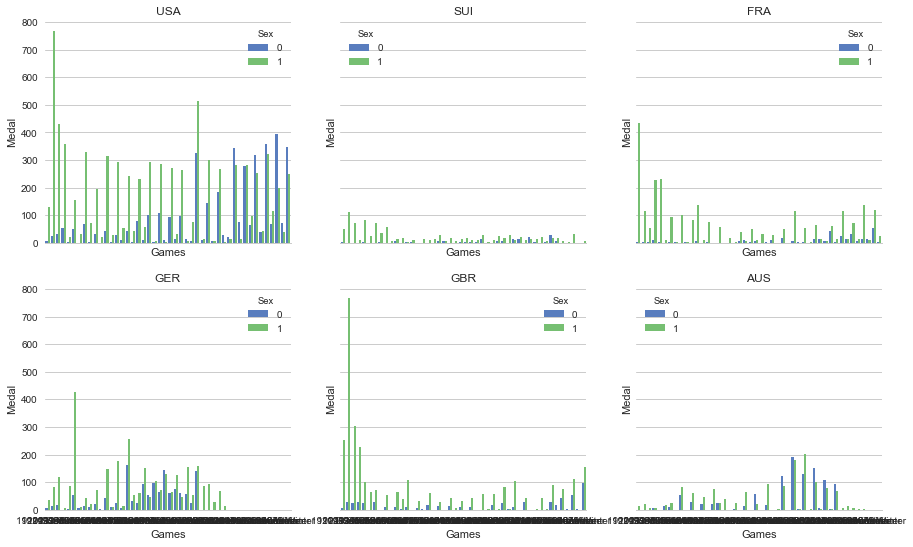

In [11]:
#Set the aesthetic for a figure
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 3, figsize=(15, 9), sharex=True, sharey = True)
sns.despine(left=True)
Subplots = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)] 
i = 0

##Make Plot of Medals by Country Hued by Sex to fill figure
for Country in Countries:
        MedalSumNew = MedalSum.loc[Country]
        ax = sns.barplot(x = 'Games', y = 'Medal', hue='Sex', data = MedalSumNew, ax=axes[Subplots[i]])
        ax.set_title(Country)
        i += 1
plt.show()

# Analysis of Medals by Sex Over Time 
Blah blah

In [12]:
#Making Dataframe to show Number of Events by Sex, Games
EventCount = DataSet.groupby(['Sex', 'Games'], as_index = True).nunique()
EventCount = EventCount[['Event', 'Sex', 'Games']]
for index in EventCount.index:
    EventCount['Sex'][index] = index[0]
    EventCount['Games'][index] = index[1]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
#Making Dataframes to show Biological Information
BiologyOverTime = DataSet.groupby(['Games', 'Sex'], as_index = True).mean()
BioCount = DataSet.groupby(['Games', 'Sex'], as_index = True).count()
SexOverTime = DataSet.groupby(['Games'], as_index = True).mean()

In [14]:
#Keeping Only Relevant Columns for Dataframes
BiologyOverTime = BiologyOverTime[['Age', 'Weight', 'Height', 'Year']]
BiologyOverTime['Games'] = 0
BiologyOverTime['Sex'] = 0
for index in BiologyOverTime.index:
    BiologyOverTime['Games'][index] = index[0]
    BiologyOverTime['Sex'][index] = index[1]
BiologyOverTime['Season'] = BiologyOverTime['Games'].astype(str).str[5:]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [15]:
#Keeping Only Relevant Columns for Dataframes
SexOverTime = SexOverTime[['Age', 'Weight', 'Height', 'Year', 'Sex']]
SexOverTime['Games'] = 0
SexOverTime['Season'] = 0
for index in SexOverTime.index:
    SexOverTime['Games'][index] = index
SexOverTime['Season'] = SexOverTime['Games'].str[5:]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
#Encoding Categorical Data (Seasons)
#summer = 0 , winter = 1
labelencoder_X1 = LabelEncoder()
BiologyOverTime['Season'] = labelencoder_X1.fit_transform(BiologyOverTime['Season'])
SexOverTime['Season'] = labelencoder_X1.fit_transform(SexOverTime['Season'])

# Summer will always be 0 and Winter will always be 1

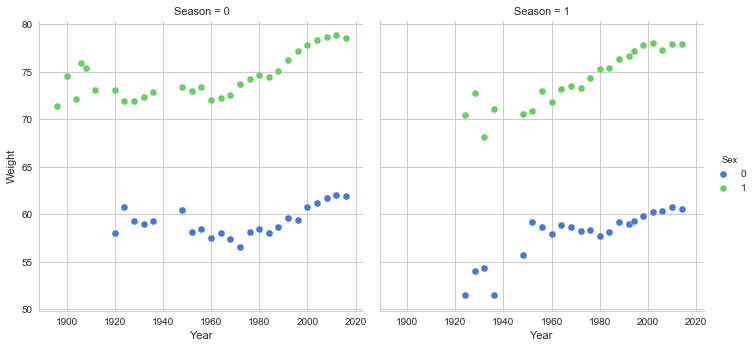

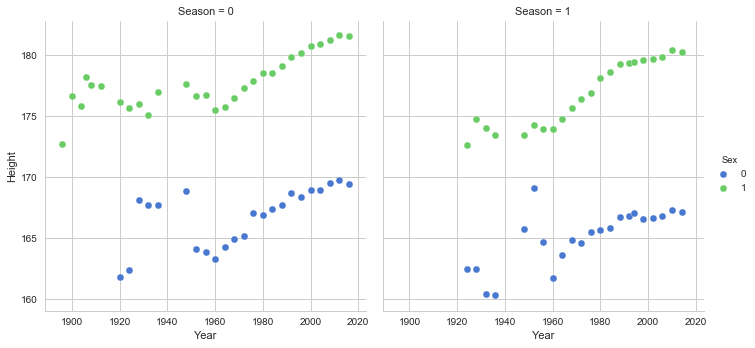

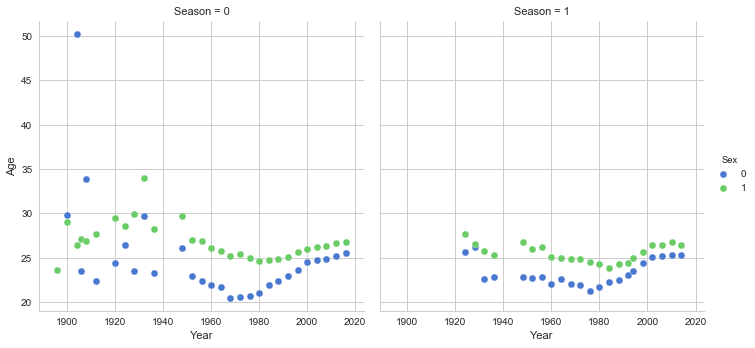

In [17]:
#Set the aesthetic for a figure
sns.set(style="whitegrid", palette="muted", color_codes=True)

##Scatter Plot for Weight
ax = sns.FacetGrid(BiologyOverTime, col = 'Season', hue ='Sex', size = 5)
ax.map(plt.scatter, 'Year', 'Weight', edgecolor="w")
ax.add_legend()

##Scatter Plot for Height
ax = sns.FacetGrid(BiologyOverTime, col = 'Season', hue ='Sex', size = 5)
ax.map(plt.scatter, 'Year', 'Height', edgecolor="w")
ax.add_legend()

##Scatter Plot for Age
ax = sns.FacetGrid(BiologyOverTime, col = 'Season', hue ='Sex', size = 5)
ax.map(plt.scatter, 'Year', 'Age', edgecolor="w")
ax.add_legend()

# Analysis of Weight, Height, and Age Hued by Sex Over Time 
First, I would like to point out the significant differences of height and weight between males and females. This is not a surprise because males are taller in the general population as well. It would be worth comparing average Olympian heights to average heights in the world over time. 

Male and female athletes have grown in both height and weight in the time period. From 1950 to 2016, there looks to be a linear growth. This is shown in both sexes (Males & Females) across both seasons (Summer & Winter). 

In early Olympic days, age is scattered all over the place. Over time, however, age has converged to around 25 years for both male and female athletes. Male athletes have always tended to be older, but not by a significant margin. 

Post 1950, record keeping looks to immprove. The data becomes less scattered and consistent over time. 

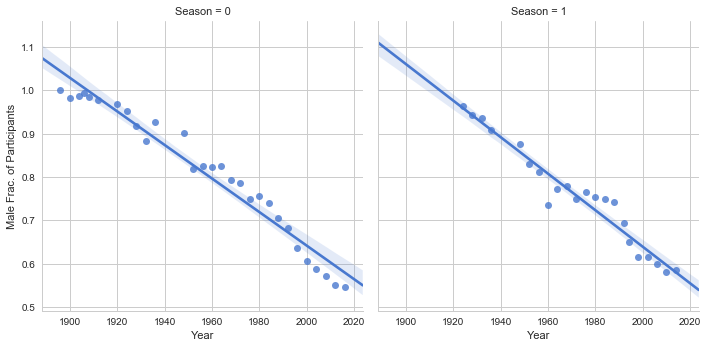

In [18]:
##Scatter Plot for Male Fraction of Participants Over Time 
ax = sns.lmplot(data = SexOverTime, x = 'Year', y = 'Sex', col = 'Season', size = 5)
ax.set_ylabels('Male Frac. of Participants')

# Analysis of Participation of Male Fraction Over Time 
Over time, it is clear that male domination of the Olympic Games has waned. This has been a very clear and gradual linear decline. We are almost reaching the point where men and women are equally represented. This trend is true for both the Winter and Summer Olympics. 

In [19]:
#Describe Biological Data 
BiologyOverTime.describe()

,Age,Weight,Height,Year,Sex,Season
count,101.000000,96.000000,96.000000,101.000000,101.000000,101.000000
mean,25.295562,66.950913,171.984840,1963.920792,0.504950,0.435644
std,3.548150,8.301647,6.219031,33.686699,0.502469,0.498314
min,20.514366,51.500000,160.375000,1896.000000,0.000000,0.000000
25%,23.092979,58.958428,166.790775,1936.000000,0.000000,0.000000
50%,25.055351,70.735400,173.445352,1968.000000,1.000000,0.000000
75%,26.409181,74.280786,177.471781,1992.000000,1.000000,1.000000
max,50.230769,78.937328,181.633557,2016.000000,1.000000,1.000000


In [20]:
#DataFrame to show Growth over time
Growth = DataSet.groupby(['Games'], as_index = True).nunique()
Growth = Growth[['NOC', 'Event', 'Name']]
Growth['Games'] = 0
for index in Growth.index:
    Growth['Games'][index] = index

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
#Keeping only relevant columns
for index in Growth.index:
    Growth['Games'][index] = index
    
Growth['Season'] = Growth['Games'].astype(str).str[5:]
Growth['Year'] = Growth['Games'].astype(str).str[:5]
Growth['Season'] = labelencoder_X1.fit_transform(Growth['Season'])

#Fixing x-labels
Growth['Year'] = Growth['Year'].apply(int) 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
#New DataFrame highlighting Male vs Female for comparison
GrowthSex = DataSet.groupby(['Games', 'Sex'], as_index = True).nunique()
GrowthSex = GrowthSex[['NOC', 'Event', 'Name']]
GrowthSex['Games'] = 0
GrowthSex['Sex'] = 0
for index in GrowthSex.index:
    GrowthSex['Games'][index] = index[0]
    GrowthSex['Sex'][index] = index[1]
    
GrowthSex['Season'] = GrowthSex['Games'].astype(str).str[5:]
GrowthSex['Year'] = GrowthSex['Games'].astype(str).str[:5]
GrowthSex['Season'] = labelencoder_X1.fit_transform(GrowthSex['Season'])

#Fix x-labels
GrowthSex['Year'] = GrowthSex['Year'].apply(int) 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


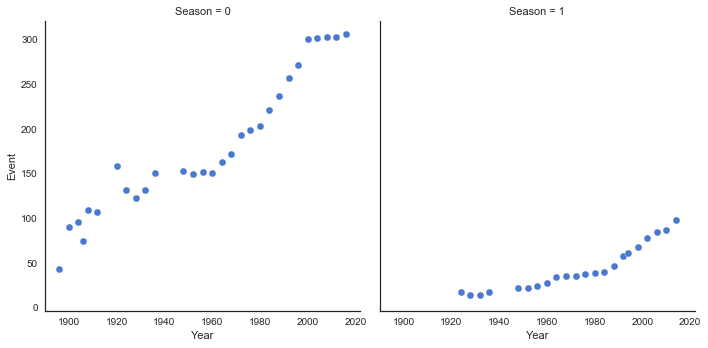

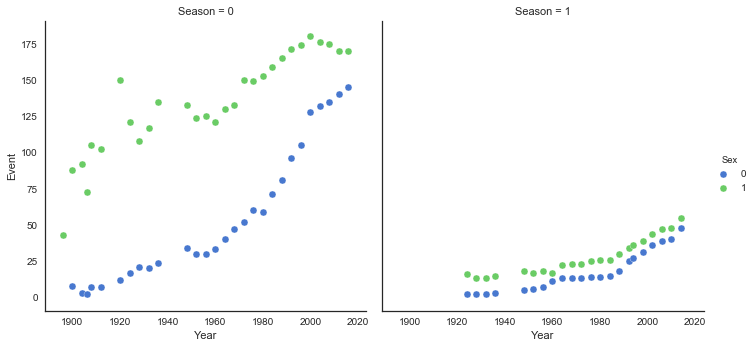

In [23]:
##Scatter Plot for Events

#Set the aesthetic for a figure
sns.set(style="white", palette="muted", color_codes=True)

#Scatter Plots for Total Events Events (summer, winter)
ax = sns.FacetGrid(Growth, col = 'Season', size = 5)
ax.map(plt.scatter, 'Year', 'Event', edgecolor="w") #.set_titles('Total Events Over Time')

##Scatter Plots for Events by Sex (summer, winter)
ax = sns.FacetGrid(GrowthSex, col = 'Season', hue = 'Sex', size = 5)
ax.map(plt.scatter, 'Year', 'Event', edgecolor="w") #.set_titles('Events Over Time by Sex')
ax.add_legend()


# Analysis of Number of Events Over Time 
The number of events grows consistently and gradually over time. Events for both males and females grow linearly for Winter Olympics. In the Summer Olympics, events increase more rapidly among women when compared to men. Women have almost come on equal ground with men when comparing number of events.     

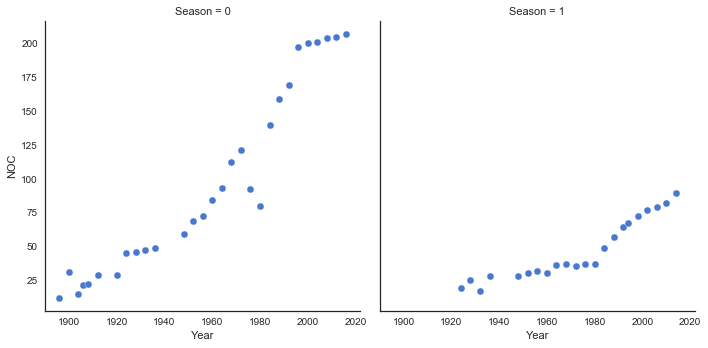

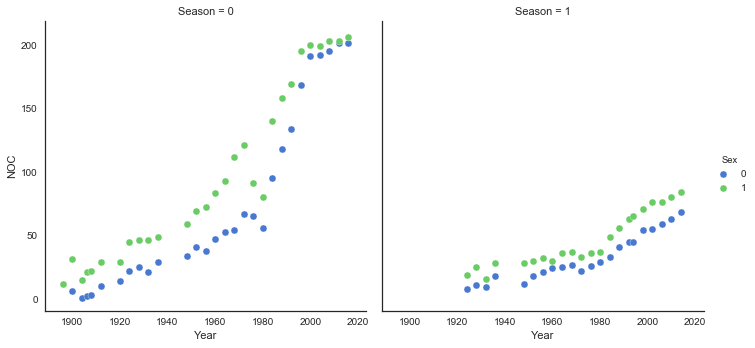

In [24]:
##Scatter Plots for NOC

#Set the aesthetic for a figure
sns.set(style="white", palette="muted", color_codes=True)

##Scatter Plots for Total Unique NOC
ax = sns.FacetGrid(Growth, col = 'Season', size = 5)
ax.map(plt.scatter, 'Year', 'NOC', edgecolor="w")

##Scatter Plot for Unique NOC by Sex
ax = sns.FacetGrid(GrowthSex, col = 'Season', hue = 'Sex', size = 5)
ax.map(plt.scatter, 'Year', 'NOC', edgecolor="w")
ax.add_legend()

# Analysis of Number of Countries Over Time 
The number of countries participating in the Olympic Games has gradually increased. In early years of the Olympics, many countries did not have a women's Olympic team. Around 1992, most countries had both a male and female team participating in the Olympics for the Summer Games. For the Winter Games, the discrepancy has always been much smaller, but the number of countires sporting a male squad has always been higher than the number of countries sporting a female squad. 

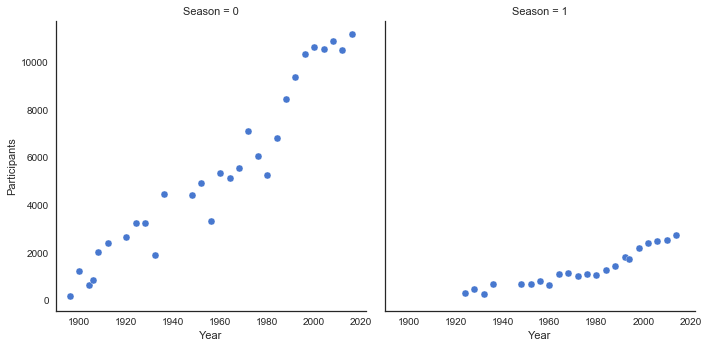

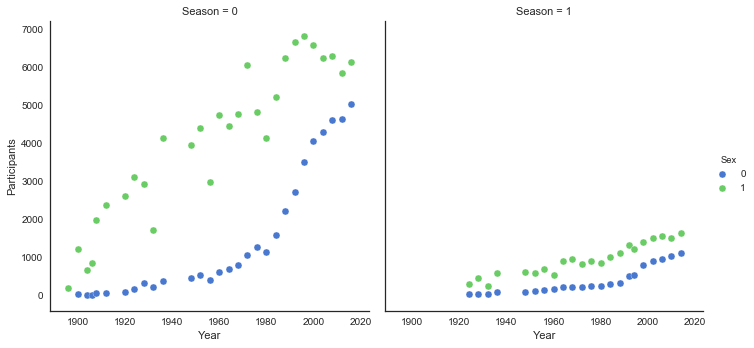

In [25]:
##Scatter Plots for Participants
#Set the aesthetic for a figure
sns.set(style="white", palette="muted", color_codes=True)

ax = sns.FacetGrid(Growth, col = 'Season', size = 5)
ax.map(plt.scatter, 'Year', 'Name', edgecolor="w")
ax.set_ylabels('Participants')

##Scatter Plot for Participants by Sex
ax = sns.FacetGrid(GrowthSex, col = 'Season', hue = 'Sex', size = 5)
ax.map(plt.scatter, 'Year', 'Name', edgecolor="w")
ax.set_ylabels('Participants')
ax.add_legend() ## HOW DO I MAKE IT SO 0 says Male and 1 says Female

# Analysis of Participants by Games
The number of participants in the games has grown very similarly to number of events. The Winter Games consistently is smaller than the summer games and has grown at a slower pace. The discrepancy between the number of male and female participants has always been higher in the summer games, but males consistently have a bigger prescence regardless of season. The gap has closed in number for both Summer and Winter Olympic Games. 


In [26]:
#Describe Growth Data 
Growth.describe()

,NOC,Event,Name,Season,Year
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,75.235294,121.411765,3672.490196,0.431373,1963.254902
std,58.798159,90.947496,3380.800529,0.500196,34.358023
min,12.000000,14.000000,176.000000,0.000000,1896.000000
25%,30.500000,38.500000,1082.500000,0.000000,1934.000000
50%,57.000000,98.000000,2409.000000,0.000000,1968.000000
75%,90.500000,167.500000,5300.000000,1.000000,1992.000000
max,207.000000,306.000000,11174.000000,1.000000,2016.000000


Text(0.5,0,'')

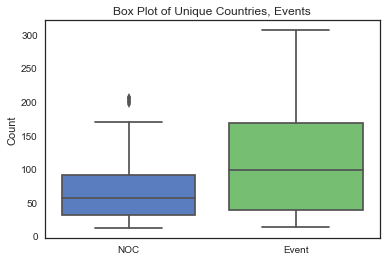

In [27]:
#DataFrame for BoxPlot showing growth over time
GrowthBoxPlot = Growth[['NOC', 'Event']]

##Box Plot of NOC, Events
ax = sns.boxplot(x = "variable", y = "value", data = pd.melt(GrowthBoxPlot))
ax.set_title('Box Plot of Unique Countries, Events')
ax.set_ylabel('Count')
ax.set_xlabel('')

# Analysis of BoxPlot

This box plot shows the range for number of countries and number of events per Olympic Games. You can easily visualize the information in this format. 